# Import Libraries and Tools

In [2]:
# !pip install fuzzy-c-means

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import fcmeans

# Load Dataset

In [3]:
path_dataset = './dataset_kuisioner_modelling.csv'

df = pd.read_csv(path_dataset)

In [4]:
df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,-2.657256,-0.553311,-0.332296,-1.826826,-1.283039,-1.072854,0.972749,2.718839,-0.737317,0.537440,...,-0.793456,-0.479510,0.093283,0.393369,0.382767,-0.014425,0.537036,0.165064,-0.251281,-0.325099
1,-2.658107,-1.416540,1.284719,-0.202546,-2.101759,0.006823,1.616920,-0.734885,0.186707,-1.241195,...,-1.161159,-0.203171,-1.202698,0.001114,-0.022056,-0.124878,-0.405926,-0.291513,-0.235841,-0.137198
2,-0.012754,2.813863,0.115969,-1.122487,-2.363684,-0.178976,0.188500,-0.997916,0.472714,-1.437456,...,-0.665922,0.249759,0.218281,-0.657759,-0.250631,0.260827,0.154919,-0.081810,0.243623,-0.484006
3,-1.376423,1.915338,-0.416493,2.047633,-0.343476,-0.463257,0.345525,-1.920936,-0.253380,0.112362,...,-0.061199,-0.009607,0.784600,0.175043,0.830930,-0.216886,0.542901,0.432775,0.486376,-0.441825
4,-3.001100,2.999899,6.045998,0.050878,-0.063987,-0.733241,0.793609,-0.207319,-2.115881,-0.057395,...,-0.869762,-0.475518,0.267251,-0.327819,-0.002154,-0.502603,-1.129568,-0.276819,-0.454630,0.675339


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC0     140 non-null    float64
 1   PC1     140 non-null    float64
 2   PC2     140 non-null    float64
 3   PC3     140 non-null    float64
 4   PC4     140 non-null    float64
 5   PC5     140 non-null    float64
 6   PC6     140 non-null    float64
 7   PC7     140 non-null    float64
 8   PC8     140 non-null    float64
 9   PC9     140 non-null    float64
 10  PC10    140 non-null    float64
 11  PC11    140 non-null    float64
 12  PC12    140 non-null    float64
 13  PC13    140 non-null    float64
 14  PC14    140 non-null    float64
 15  PC15    140 non-null    float64
 16  PC16    140 non-null    float64
 17  PC17    140 non-null    float64
 18  PC18    140 non-null    float64
 19  PC19    140 non-null    float64
 20  PC20    140 non-null    float64
 21  PC21    140 non-null    float64
 22  PC

In [6]:
df.describe()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
count,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,...,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02
mean,2.030122e-16,-2.791418e-16,3.298948e-16,-4.187127e-16,-3.806479e-16,6.915103e-16,8.437695e-16,2.981742e-16,-3.045183e-16,-2.347329e-16,...,-1.268826e-16,6.344132e-17,-8.881784e-17,-8.723181e-17,2.537653e-17,-1.015061e-16,-5.075305e-17,6.026925e-17,-5.709718e-17,1.348128e-17
std,2.436817e+00,2.234865e+00,1.822045e+00,1.544288e+00,1.480629e+00,1.310829e+00,1.283850e+00,1.240174e+00,1.173797e+00,1.092679e+00,...,5.892576e-01,5.817681e-01,5.636201e-01,5.568244e-01,5.397794e-01,5.211005e-01,4.970170e-01,4.770276e-01,4.682021e-01,4.604706e-01
min,-4.587442e+00,-4.489446e+00,-3.686159e+00,-3.769553e+00,-4.006693e+00,-3.387487e+00,-3.163696e+00,-2.823124e+00,-2.607930e+00,-2.544207e+00,...,-1.247608e+00,-1.272502e+00,-1.501340e+00,-1.409879e+00,-1.327629e+00,-1.122565e+00,-1.129568e+00,-1.110034e+00,-1.183773e+00,-1.145762e+00
25%,-1.902097e+00,-1.472902e+00,-1.374227e+00,-8.157380e-01,-9.739542e-01,-8.923211e-01,-8.634936e-01,-9.024379e-01,-7.886265e-01,-6.507218e-01,...,-3.988324e-01,-4.223537e-01,-3.712182e-01,-4.155768e-01,-3.476440e-01,-3.175901e-01,-3.738383e-01,-3.186375e-01,-3.114439e-01,-3.338668e-01
50%,-2.030382e-01,-2.908713e-01,-8.098521e-02,1.125991e-02,-6.238529e-02,-4.260329e-03,6.337375e-02,-1.135454e-01,7.763696e-02,-1.595804e-02,...,-2.965916e-02,-1.956665e-02,5.021299e-02,3.361313e-02,3.329821e-03,-3.920614e-02,2.945477e-02,7.230667e-03,6.520675e-03,-7.459400e-03
75%,1.678094e+00,1.612028e+00,1.226368e+00,9.342663e-01,9.434921e-01,7.511485e-01,7.362032e-01,7.928434e-01,7.221814e-01,6.684862e-01,...,3.284740e-01,3.835893e-01,4.317805e-01,3.256467e-01,2.922124e-01,3.324171e-01,3.247032e-01,3.109915e-01,2.940014e-01,2.982985e-01
max,5.181417e+00,5.615289e+00,6.765466e+00,4.026012e+00,4.522664e+00,3.710301e+00,3.860608e+00,3.053311e+00,3.483124e+00,3.226572e+00,...,1.720253e+00,1.733097e+00,1.567696e+00,1.480973e+00,1.476478e+00,1.331325e+00,1.267064e+00,1.609483e+00,1.210989e+00,1.369300e+00


#

# Create Clustering Model

## K-Means Clustering

references: <br>
https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/ <br>

### Determine Total Cluster using Elbow Plot

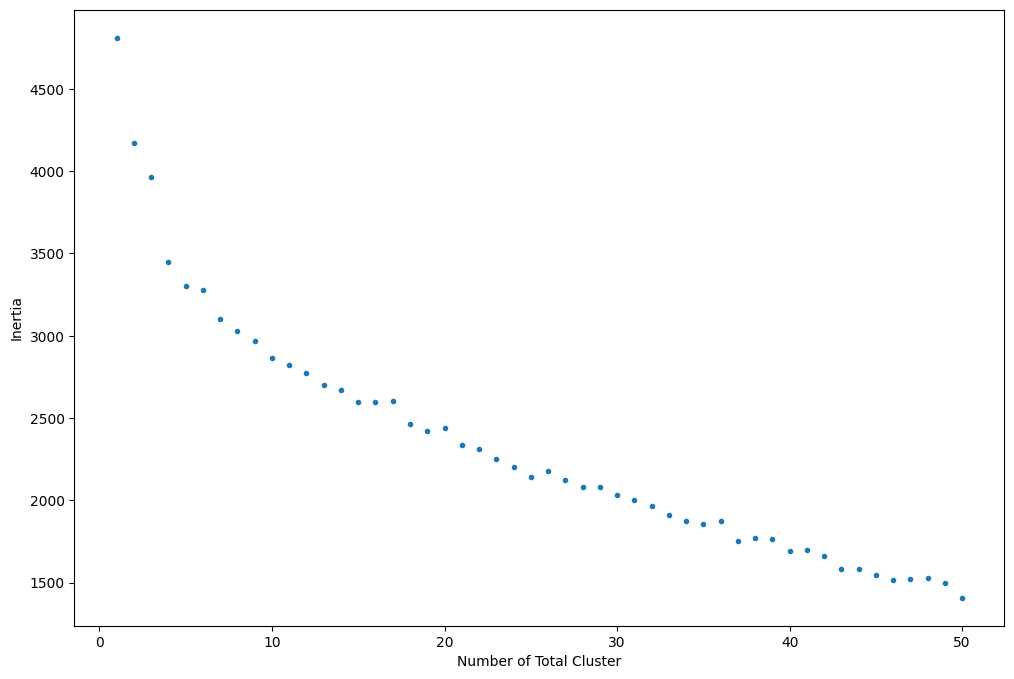

In [9]:
inertia_values = []
max_cluster = 50

for cluster in range(max_cluster):
#     print(cluster)
    kmeans = KMeans(n_clusters=cluster+1, n_init='auto')
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=[12, 8])

plt.plot(np.arange(1, max_cluster+1, step=1), inertia_values, marker='.', linestyle='')

plt.xlabel('Number of Total Cluster')
plt.ylabel('Inertia')

plt.show()

## Fuzzy C-Means Clustering